In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import seaborn as sns
import datetime
import geopandas as gpd

In [58]:
def plot_prov_ax(prov, ax, linewidth = 1):

  #load shapefile of provincial boundaries
  provshapes_filename = './Data/PROVINCE.SHP'
  provshapes = gpd.read_file(provshapes_filename)

  #create list of all prov/territorial abbreviations
  prov_abbreviations = [
                        'AB',
                        'SK',
                        'MB',
                        'NL',
                        'PE',
                        'NS',
                        'NT',
                        'NU',
                        'ON',
                        'NB',
                        'YT',
                        'BC',
                        'QC'
                      ]

  #if wanting to plot all borders
  if prov == 'all':
    prov = prov_abbreviations

  #loop through each input province/territory and plot borders
  for pv in prov:

    #polygons of this province/territory
    prov_poly = provshapes['geometry'][prov_abbreviations.index(pv)]

    #some jurisdictions have multiple polygones from lakes/islands/etc (e.g. BC)
    if prov_poly.geom_type == 'Polygon': #if only one polygon to plot

      lonBorder,latBorder = prov_poly.exterior.coords.xy 
      ax.plot(lonBorder,latBorder,'k', linewidth = linewidth)

    else: #if multiply polygons in shape to plot

      for ind in range(len(prov_poly.geoms)): 
        lonBorder_segment,latBorder_segment = prov_poly.geoms[ind].exterior.coords.xy 
        ax.plot(lonBorder_segment,latBorder_segment,'k', linewidth = linewidth)

In [59]:
#open weather station data

dir_data = '/Users/samanderson/repos/heatwave_obs/Data/'
filename = 'Station Inventory EN.csv'

df_ws = pd.read_csv(dir_data + filename, skiprows = [0,1,2]) #ws == 'weather station'
df_ws.head()

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,ACTIVE PASS,BRITISH COLUMBIA,1010066,14,NaN,NaN,48.87,-123.28,485200000.0,-1.231700e+09,4.0,1984,1996,NaN,NaN,1984.0,1996.0,1984.0,1996.0
1,ALBERT HEAD,BRITISH COLUMBIA,1010235,15,NaN,NaN,48.40,-123.48,482400000.0,-1.232900e+09,17.0,1971,1995,NaN,NaN,1971.0,1995.0,1971.0,1995.0
2,BAMBERTON OCEAN CEMENT,BRITISH COLUMBIA,1010595,16,NaN,NaN,48.58,-123.52,483500000.0,-1.233100e+09,85.3,1961,1980,NaN,NaN,1961.0,1980.0,1961.0,1980.0
3,BEAR CREEK,BRITISH COLUMBIA,1010720,17,NaN,NaN,48.50,-124.00,483000000.0,-1.240000e+09,350.5,1910,1971,NaN,NaN,1910.0,1971.0,1910.0,1971.0
4,BEAVER LAKE,BRITISH COLUMBIA,1010774,18,NaN,NaN,48.50,-123.35,483000000.0,-1.232100e+09,61.0,1894,1952,NaN,NaN,1894.0,1952.0,1894.0,1952.0


In [60]:
#open RHBN metadata -- does not include start or end year of record, only number of years

dir_data = '/Users/samanderson/repos/heatwave_obs/Data/'
filename = 'RHBN_Metadata2.csv'

df_RHBN = pd.read_csv(dir_data + filename, skiprows = [0,1,3])
df_RHBN.head()

,STATION_NUMBER,Evaluation_Year,RHBN-N,DATA_TYPE,Yield,Ecoregion,Data.Quality,Years.C,Years.S,Watershed.Quality,Percent_Human.Impact,Percent.Urban,Road.Density,Pop.Density,Flow.Structures,Reservoir.Pct,GRanD
0,01AD002,2020,1,Q,600.0,Northern Forests,C,88.0,NaN,2,0.340,0.032,0.14,71.0,72,0.170,Lock Dam
1,01AD003,2020,1,Q,590.0,Northern Forests,C,65.0,NaN,2,0.027,0.000,0.00,71.0,18,0.680,NaN
2,01AE001,2020,0,Q,620.0,Eastern Temperate Forests,C,34.0,NaN,1,1.900,0.036,0.00,71.0,1,0.000,NaN
3,01AF007,2020,0,Q,710.0,Eastern Temperate Forests,C,40.0,NaN,1,0.070,0.000,0.24,2.0,0,0.000,NaN
4,01AF009,2020,0,Q,680.0,Eastern Temperate Forests,C,26.0,NaN,1,0.000,0.000,0.40,23.0,1,0.015,NaN


In [61]:
#open hydat summary of all stations -- includes start and end year of record for each station

dir_data = '/Users/samanderson/repos/heatwave_obs/Data/'
filename = 'HydatStations_all2.csv'

df_hydat = pd.read_csv(dir_data + filename)
df_hydat.head()

,Station,Fav,StationName,HydStatus,Prov,Latitude(Degrees),Longitude(Degrees),DrainageArea(km≤),Years,From,...,Reg.,Flow,Level,Sed,OperSched,RealTime,RHBN,Region,Datum,Operator
0,01AA002,,DAAQUAM (RIVIERE) EN AVAL DE LA RIVIERE SHIDGEL,Discontinued,QC,46.5575,-70.0811,598,11,1967,...,,True,,,Continuous,,,QUEBEC CITY,ARBITRAIRE,MINISTERE DE L'ENVIRONNEMENT DU QUEBEC
1,01AD001,,MADAWASKA (RIVIERE) A 6 KM EN AVAL DU BARRAGE...,Discontinued,QC,47.5483,-68.6364,2690,80,1918,...,True,True,,,Continuous,,,QUEBEC CITY,ARBITRAIRE,MINISTERE DE L'ENVIRONNEMENT DU QUEBEC
2,01AD002,,SAINT JOHN RIVER AT FORT KENT,Active,ME,47.2581,-68.5958,14700,93,1926,...,,True,,,Continuous,,True,DARTMOUTH,INTERNATIONAL BOUNDARY COMMISSION DATUM,UNITED STATES GEOLOGICAL SURVEY
3,01AD003,,ST. FRANCIS RIVER AT OUTLET OF GLASIER LAKE,Active,NB,47.2066,-68.9569,1350,68,1951,...,,True,True,,Continuous,True,True,DARTMOUTH,ASSUMED DATUM,WATER SURVEY OF CANADA (DOE) (CANADA)
4,01AD004,,SAINT JOHN RIVER AT EDMUNDSTON,Active,NB,47.3608,-68.3249,15500,35,1968,...,,True,True,,Continuous,True,,DARTMOUTH,GEODETIC SURVEY OF CANADA DATUM,WATER SURVEY OF CANADA (DOE) (CANADA)


In [62]:
df_hydat.columns

Index(['Station', ' Fav', ' StationName', ' HydStatus', ' Prov',
       ' Latitude(Degrees)', ' Longitude(Degrees)', ' DrainageArea(km≤)',
       ' Years', ' From', ' To', ' Reg.', ' Flow', ' Level', ' Sed',
       ' OperSched', ' RealTime', ' RHBN', ' Region', ' Datum', ' Operator'],
      dtype='object')

In [63]:
#add in lat / lon / from / to / name from hydat data to rhbn data

N_RHBN = len(df_RHBN)
lat = np.zeros(N_RHBN)
lon = np.zeros(N_RHBN)
years_start = np.zeros(N_RHBN)
years_end = np.zeros(N_RHBN)
station_name = [None for kk in range(N_RHBN)]
province = [None for kk in range(N_RHBN)]

for station in range(N_RHBN):
    lat[station] = df_hydat[' Latitude(Degrees)'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]]
    lon[station] = df_hydat[' Longitude(Degrees)'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]]
    years_start[station] = df_hydat[' From'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]]
    years_end[station] = df_hydat[' To'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]]
    station_name[station] = df_hydat[' StationName'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]].values[0]
    province[station] = df_hydat[' Prov'][df_hydat['Station']==df_RHBN['STATION_NUMBER'][station]].values[0]
        
df_RHBN['Latitude'] = lat
df_RHBN['Longitude'] = lon
df_RHBN['Years_start'] = years_start
df_RHBN['Years_end'] = years_end
df_RHBN['Station_name'] = station_name
df_RHBN['Province'] = province

In [64]:
N_RHBN

1027

In [72]:
### USING SINGLE WEATHER STATIONS

#for each stream gauge, find if there is a nearby weather station with overlapping data records of sufficient length

ws_RHBN = np.zeros(N_RHBN) #weather station number linked to each RHBN station
N_years_overlap_min = 70 #at least X years of overlap
N_year_span_min = 80 #span of time over which the overlapping years are recorded
dmin = 20 #km threshold to define weather stations that are 'close' to the RHBN stations

station_longterm_RHBN = []

for station in range(N_RHBN):
    
    Nyears_RHBN = df_RHBN['Years.C'][station] #continuous flow years for this station
    years_span = df_RHBN['Years_end'][station] - df_RHBN['Years_start'][station] + 1 #span over which continuous flow years occur
    
    if (Nyears_RHBN > N_years_overlap_min) & (years_span > N_year_span_min): #if more than minimum possible number of years
        
        lat_RHBN = df_RHBN['Latitude'][station] #for this station
        lon_RHBN = df_RHBN['Longitude'][station] #for this station
        
        lon_ws = df_ws['Longitude (Decimal Degrees)'] #for all weather stations
        lat_ws = df_ws['Latitude (Decimal Degrees)'] #for all weather stations
    
        deg_to_km = 114 #approximate number of km per degree at this latitude
        d = np.sqrt((lat_RHBN - lat_ws)**2 + (lon_RHBN - lon_ws)**2).values * deg_to_km #approximate distance between this RHBN station and all weather stations
        
        nearby_ws = np.argwhere(d < dmin)
        N_nearby_ws = np.size(nearby_ws)
        lat_nearby_ws = np.array([df_ws['Latitude (Decimal Degrees)'][ws].values[0] for ws in nearby_ws])
        lon_nearby_ws = np.array([df_ws['Longitude (Decimal Degrees)'][ws].values[0] for ws in nearby_ws])
        name_nearby_ws = np.array([df_ws['Name'][ws].values[0] for ws in nearby_ws])
        
        # print(N_nearby_ws, station)
        
        for ws in nearby_ws:
            
            # if station == 345:
            #     print(df_ws['Name'][ws])
            
            year_start_ws = df_ws['First Year'][ws].values
            year_end_ws = df_ws['Last Year'][ws].values
            
            if year_end_ws - year_start_ws > N_years_overlap_min: #if this weather station also has the minimum possible record
            
                year_start_RHBN = df_RHBN['Years_start'][station]
                year_end_RHBN = df_RHBN['Years_end'][station]

                years_ws = np.arange(year_start_ws, year_end_ws + 1)
                years_RHBN = np.arange(year_start_RHBN, year_end_RHBN + 1)

                years_overlap = np.array([value for value in years_ws if value in years_RHBN])
                N_years_overlap = len(years_overlap)
    
                if N_years_overlap > N_years_overlap_min:
                    prov = df_RHBN['Province'][station]
                    if (prov == ' AB') | (prov == ' BC'):
                        print(df_RHBN['Province'][station])
                        print('\t' + df_RHBN['Station_name'][station][1:] + ' (' + df_RHBN['STATION_NUMBER'][station] + ')')
                        print('\t' + df_ws['Name'][ws].values[0] + ' (' + str(df_ws['Station ID'][ws].values[0]) + ')')
                        print('\t' + str(years_overlap[0]) + ' - ' + str(years_overlap[-1]))

                        station_longterm_RHBN.append(station)
                    
station_longterm_RHBN = np.array(station_longterm_RHBN)
        

 AB
	BOW RIVER AT BANFF (05BB001)
	BANFF (2364)
	1909 - 1995
 BC
	STUART RIVER NEAR FORT ST. JAMES (08JE001)
	FORT ST JAMES (588)
	1929 - 2018
 BC
	CHILLIWACK RIVER AT VEDDER CROSSING (08MH001)
	CHILLIWACK (735)
	1911 - 2014
 BC
	COLUMBIA RIVER AT NICHOLSON (08NA002)
	GOLDEN A (1364)
	1903 - 2018
 BC
	SIMILKAMEEN RIVER AT PRINCETON (08NL007)
	PRINCETON A (1056)
	1936 - 2017


In [69]:
### USING MULTIPLE WEATHER STATIONS TO STITCH TOGETHER A RECORD

#for each stream gauge, find if there are nearby weather stations with overlapping data records of sufficient length

ws_RHBN = np.zeros(N_RHBN) #weather station number linked to each RHBN station
N_years_overlap_min = 70 #at least X years of overlap
N_year_span_min = 80 #span of time over which the overlapping years are recorded
dmin = 20 #km threshold to define weather stations that are 'close' to the RHBN stations

station_longterm_RHBN = [] #stations with longterm concurrent streamflow / weather observations

for station in range(N_RHBN): #for each stream gauge station
    
    Nyears_RHBN = df_RHBN['Years.C'][station] #continuous flow years for this station 
    years_span = df_RHBN['Years_end'][station] - df_RHBN['Years_start'][station] + 1 #span over which continuous flow years occur
    
    if (Nyears_RHBN > N_years_overlap_min) & (years_span > N_year_span_min): #if more than minimum possible number of years
        
        lat_RHBN = df_RHBN['Latitude'][station] #for this station
        lon_RHBN = df_RHBN['Longitude'][station] #for this station
        
        lon_ws = df_ws['Longitude (Decimal Degrees)'] #for all weather stations
        lat_ws = df_ws['Latitude (Decimal Degrees)'] #for all weather stations
    
        deg_to_km = 114 #approximate number of km per degree at this latitude
        d = np.sqrt((lat_RHBN - lat_ws)**2 + (lon_RHBN - lon_ws)**2).values * deg_to_km #approximate distance between this RHBN station and all weather stations
        
        nearby_ws = np.argwhere(d < dmin)
        N_nearby_ws = np.size(nearby_ws)
        lat_nearby_ws = np.array([df_ws['Latitude (Decimal Degrees)'][ws].values[0] for ws in nearby_ws])
        lon_nearby_ws = np.array([df_ws['Longitude (Decimal Degrees)'][ws].values[0] for ws in nearby_ws])
        name_nearby_ws = np.array([df_ws['Name'][ws].values[0] for ws in nearby_ws])
        
        if np.size(nearby_ws) > 0: #if there is at least one nearby weather station

            #ws locations 
            points = np.zeros((N_nearby_ws, 2))
            points[:,0] = lat_nearby_ws
            points[:,1] = lon_nearby_ws

            #distance between all candidate weather stations
            ws_distances = np.linalg.norm(points - points[:,None], axis=-1) * 114 #scale by 114 to get approximate degrees-to-km

            #only select weather stations that are 'close' to each other
            inds_close_ws = np.argwhere(ws_distances < 2*dmin)
            if N_nearby_ws > 1:
                inds_close_ws = inds_close_ws[inds_close_ws[:,0]!=inds_close_ws[:,1]] #remove diagonal
                for kk, inds in enumerate(inds_close_ws): #sort each weather station pair
                    inds_close_ws[kk,:] = np.sort(inds)
                inds_close_ws = np.unique(inds_close_ws) #remove duplicate weather station pairs (e.g. [2, 3] and [3,2] --> [2,3])

            #calculate years of data among weather stations that are close to each other
            inds_in_full_df = nearby_ws[inds_close_ws].squeeze()
            nearby_year_start = df_ws['First Year'][inds_in_full_df].values
            nearby_year_end = df_ws['Last Year'][inds_in_full_df].values
            list_years_nearby_ws = []#[None for kk in range(len(inds_close_ws))]
            for kk in range(len(inds_close_ws)):
                years = np.arange(nearby_year_start[kk], nearby_year_end[kk]+1)
                for year in years:
                    list_years_nearby_ws.append(year)      
            years_nearby_ws = np.unique(list_years_nearby_ws) #the years of data available between 

            #calculate longest continuous record of weather 
            v = years_nearby_ws
            best = []
            run = []
            for i in range(1, len(v) + 1):
                run.append(v[i-1])
                if i == len(v) or v[i-1] + 1 != v[i]:
                    if len(best) < len(run):
                        best = run
                    run = []
            years_nearby_ws = np.array(best)

            year_start_ws = years_nearby_ws[0]
            year_end_ws = years_nearby_ws[-1]

            if year_end_ws - year_start_ws > N_years_overlap_min: #if these weather stations also have the minimum possible record

                year_start_RHBN = df_RHBN['Years_start'][station]
                year_end_RHBN = df_RHBN['Years_end'][station]

                years_ws = np.arange(year_start_ws, year_end_ws + 1)
                years_RHBN = np.arange(year_start_RHBN, year_end_RHBN + 1)

                years_overlap = np.array([value for value in years_ws if value in years_RHBN])
                N_years_overlap = len(years_overlap)

                if N_years_overlap > N_years_overlap_min:
                    prov = df_RHBN['Province'][station]
                    if (prov == ' AB') | (prov == ' BC'):
                        print(df_RHBN['Province'][station] + ': ' + str(N_years_overlap))
                        print('\t' + df_RHBN['Station_name'][station][1:] + ' (' + df_RHBN['STATION_NUMBER'][station] + ')')
                        if N_nearby_ws == 1:
                            print('\t' + df_ws['Name'][ws].values[0] + ' (' + str(df_ws['Station ID'][ws].values[0]) + ')')
                        else:
                            for ws in nearby_ws[inds_close_ws].squeeze():
                                print('\t' + df_ws['Name'][ws] + ' (' + str(df_ws['Station ID'][ws]) + ')')
                        print('\t' + str(years_overlap[0]) + ' - ' + str(years_overlap[-1]))

                        station_longterm_RHBN.append(station)
                    
station_longterm_RHBN = np.array(station_longterm_RHBN)
        

 AB: 111
	WATERTON RIVER NEAR WATERTON PARK (05AD003)
	CAMERON FALLS (2373)
	MOUNTAIN VIEW BIRDSEYE (2419)
	WATERTON PARK GATE (26850)
	WATERTON LAKES BAKER (2443)
	WATERTON LAKES BELLY R (2444)
	WATERTON LAKES CEDAR CAB (2446)
	WATERTON LAKES PASS CRK (2447)
	WATERTON PARK HQ (2449)
	WATERTON RIVER CABIN (2450)
	1908 - 2018
 AB: 110
	BOW RIVER AT BANFF (05BB001)
	ANTHRACITE (2362)
	BANFF CS (27378)
	BANFF (2364)
	BANFF (AUT) (8811)
	BANFF CR10 (27210)
	BANFF SPRINGS (31198)
	MT RUNDLE EAST (46928)
	1909 - 2018
 BC: 90
	STUART RIVER NEAR FORT ST. JAMES (08JE001)
	FORT ST JAMES (588)
	FORT ST JAMES A (589)
	FORT ST JAMES AUTO (51538)
	FORT ST JAMES GOLF CLUB (55363)
	1929 - 2018
 BC: 104
	LILLOOET RIVER NEAR PEMBERTON (08MG005)
	PEMBERTON AIRPORT (WIND) (46747)
	PEMBERTON AIRPORT CS (536)
	PEMBERTON BCFS (537)
	PEMBERTON AIRPORT CWS (48308)
	PEMBERTON MEADOWS (538)
	1914 - 2017
 BC: 107
	CHILLIWACK RIVER AT VEDDER CROSSING (08MH001)
	CHILLIWACK (735)
	CHILLIWACK CITY (736)
	CHILLIWACK G

In [ ]:
#NOTES on the above from manual inspection of the data

#Waterton and Slocan both have missing temperature data during several decades of their "overlap"
#Slocan missing from 1929 - 1958 while Waterton is missing most temperature data before 1974
#so we will not include these two stations

#Similkameen has some early 20th century streamflow followed by a long gap, and then continuous from 1939 onwards
#We will use only the later, continuous years
#because of this, Similkameen ends up having just under 80 years of data for use; consider this fine

#Columbia and Stuart are simplest, with single weather stations and long continuous records 

#Bow has one long weather station that ends in 1994; then a different one at the same location from 1995 onwards
#These two records can be combined because the second weather station replaced the first

#Lillooet has three weather stations that are nearby and at similar elevation that can be combined 
#Meadows, BCFS, Airport CS

#Chilliwack streamflow has a gap from 1931 - 1950; this gap is shorter than for Waterton and Slocan
#should still be useful considering there is ~20 years before the gap begins

(48.0, 61.0)

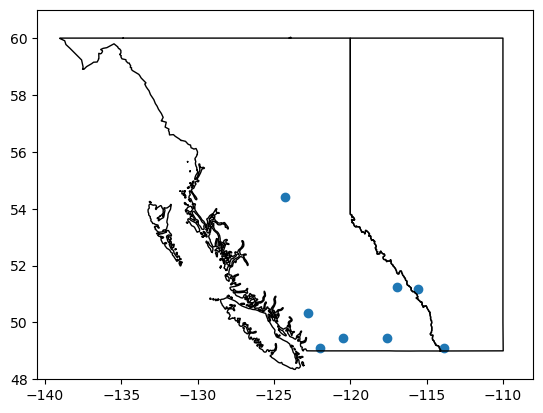

In [67]:
fig, ax = plt.subplots()

plot_prov_ax(prov = ['AB','BC'], ax = ax)
xx = df_RHBN['Longitude'][station_longterm_RHBN].values
yy = df_RHBN['Latitude'][station_longterm_RHBN].values
ax.scatter(xx,yy)

ax.set_xlim(right = -108)
ax.set_ylim(bottom = 48, top = 61)

In [23]:
#remove waterton and slocan because of the gaps in their weather station data
#Slocan gap from 1929 - 1958; Waterton missing most temperature data before 1974
df_RHBN.iloc[station_longterm_RHBN[[1,5,2,3,7,4]]] 

,STATION_NUMBER,Evaluation_Year,RHBN-N,DATA_TYPE,Yield,Ecoregion,Data.Quality,Years.C,Years.S,Watershed.Quality,...,Pop.Density,Flow.Structures,Reservoir.Pct,GRanD,Latitude,Longitude,Years_start,Years_end,Station_name,Province
345,05BB001,2020,1,Q,560.0,Northwest Forested Mountains,C,106.0,NaN,1,...,35.0,3,0.000,NaN,51.1722,-115.572,1909.0,2018.0,BOW RIVER AT BANFF,AB
870,08NA002,2020,0,Q,510.0,Northwest Forested Mountains,C,97.0,13.0,1,...,2.0,2,0.000,NaN,51.2436,-116.913,1903.0,2018.0,COLUMBIA RIVER AT NICHOLSON,BC
801,08JE001,2020,1,Q,290.0,Northwest Forested Mountains,C,72.0,9.0,1,...,1.0,0,0.000,NaN,54.4169,-124.271,1929.0,2018.0,STUART RIVER NEAR FORT ST. JAMES,BC
857,08MG005,2020,1,Q,1900.0,Marine West Coast Forests,C,89.0,7.0,1,...,1.0,0,0.000,NaN,50.3360,-122.800,1914.0,2017.0,LILLOOET RIVER NEAR PEMBERTON,BC
910,08NL007,2020,1,Q,410.0,Northwest Forested Mountains,C,73.0,3.0,1,...,71.0,2,0.031,NaN,49.4597,-120.504,1914.0,2017.0,SIMILKAMEEN RIVER AT PRINCETON,BC
861,08MH001,2020,1,Q,1700.0,Northwest Forested Mountains,C,79.0,3.0,1,...,71.0,0,0.000,NaN,49.0974,-121.967,1911.0,2017.0,CHILLIWACK RIVER AT VEDDER CROSSING,BC


In [38]:
saveDF = 0
if saveDF:
    df_RHBN.iloc[station_longterm_RHBN[[1,5,2,3,7,4]]].to_csv('Data/RHBN_longterm_stations.csv')

In [17]:
df_longterm = pd.read_csv('Data/RHBN_longterm_stations.csv')

In [18]:
df_longterm

,Unnamed: 0,STATION_NUMBER,Evaluation_Year,RHBN-N,DATA_TYPE,Yield,Ecoregion,Data.Quality,Years.C,Years.S,...,Pop.Density,Flow.Structures,Reservoir.Pct,GRanD,Latitude,Longitude,Years_start,Years_end,Station_name,Province
0,345.0,05BB001,2020,1,Q,560,Northwest Forested Mountains,C,106,NaN,...,35,3,0.000,NaN,51.1722,-115.572,1909,2018,BOW RIVER AT BANFF,AB
1,870.0,08NA002,2020,0,Q,510,Northwest Forested Mountains,C,97,13.0,...,2,2,0.000,NaN,51.2436,-116.913,1903,2018,COLUMBIA RIVER AT NICHOLSON,BC
2,801.0,08JE001,2020,1,Q,290,Northwest Forested Mountains,C,72,9.0,...,1,0,0.000,NaN,54.4169,-124.271,1929,2018,STUART RIVER NEAR FORT ST. JAMES,BC
3,857.0,08MG005,2020,1,Q,1900,Marine West Coast Forests,C,89,7.0,...,1,0,0.000,NaN,50.3360,-122.800,1914,2017,LILLOOET RIVER NEAR PEMBERTON,BC
4,910.0,08NL007,2020,1,Q,410,Northwest Forested Mountains,C,73,3.0,...,71,2,0.031,NaN,49.4597,-120.504,1914,2017,SIMILKAMEEN RIVER AT PRINCETON,BC
5,NaN,08MH001,2020,1,Q,1700,Northwest Forested Mountains,C,79,3.0,...,71,0,0.000,NaN,49.0974,-121.967,1911,2017,CHILLIWACK RIVER AT VEDDER CROSSING,BC
